0.0 14.200000000000003
MLE: 4.100
s90: 14.300


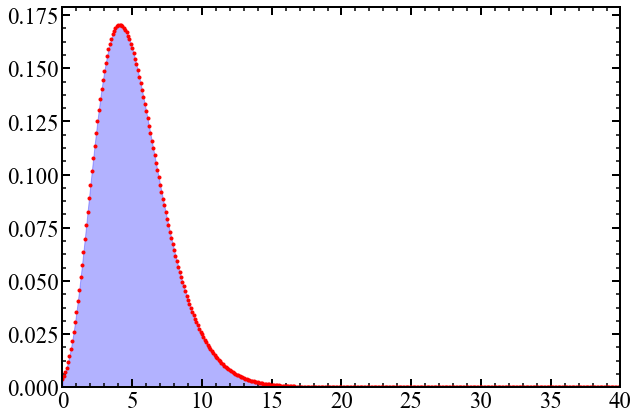

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log
/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Nimbus Roman Italic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


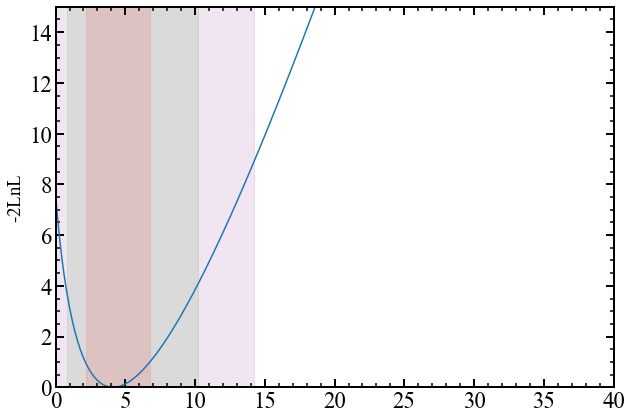

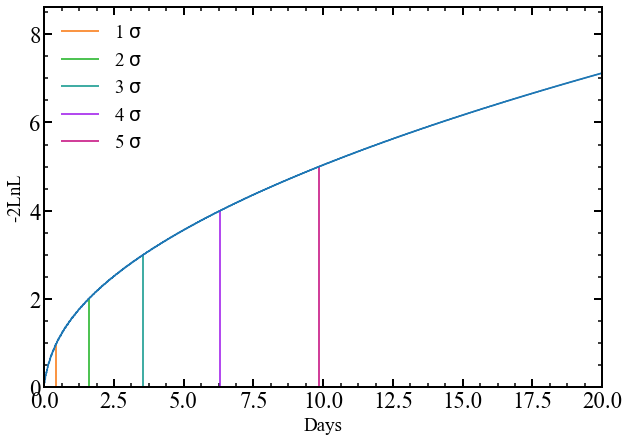

In [2]:
'''
The following is a poisson likelihood for measuring a signal in the presence of a
known background.
'''
from scipy.special import gamma, erf, erfinv
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('snoplus')

bkg_nom = (2.8)/7.
measure_nom = bkg_nom+(4.8*2)/7.
livetime = 3 # week

# Test
#bkg_nom = (2.8+4.8)/7
#measure_nom = bkg_nom + 4.8/7

bkg = bkg_nom * livetime
measure = measure_nom * livetime
cl = 3 #sigma

def cumulative(x, f, alpha):
    # s >= 0 prior
    f[x<0] = 0
    # bin-normalize
    f = f / np.sum(f)
    # cumulative
    c = np.cumsum(f)
    return x[c>alpha][0]

def cousins(x, f, alpha):
    f[x<0] = 0
    ss = f.argsort()[::-1]
    cc = np.cumsum(f[ss])
    cc = cc / np.max(cc)
    xlbound = np.min((x[ss])[cc<alpha])
    xrbound = np.max((x[ss])[cc<alpha])
    return xlbound, xrbound

def likelihood(s,b,n):
    a = s+b
    a[a<0]=0
    return (a)**n * np.e**(-(a)) / gamma(n+1)

def sigma_to_cl(sigma):
    return erf(sigma/2**0.5)

def cl_to_sigma(cl):
    return erfinv(cl)*2**0.5

def cousins_zero_cl(x, f):
    f[x<0] = 0
    ss = f.argsort()[::-1]
    cc = np.cumsum(f[ss])
    cc = cc / np.max(cc)
    return np.min(cc[x[ss]<=0])
    

x = np.linspace(-10,300,3101)
prob = likelihood(x, bkg, measure)
xl, xr = cousins(x, prob, sigma_to_cl(cl))
print(xl, xr)

print('MLE: %0.3f' % x[np.argmax(prob)])
print('s90: %0.3f' % s90)

xmin, xmax = 0, 40

plt.plot(x, prob, '.', color='red')
plt.fill_between(x, prob, where=(x>=xl)&(x<=xr), color='blue', alpha=0.3)
plt.xlim(xmin,xmax)
plt.ylim(bottom=0)
plt.show()

# Delta Log-Likelihood
dll = -2*np.log(prob)
dll = dll - np.min(dll)
plt.plot(x, dll)
xl1, xr1 = cousins(x, prob, sigma_to_cl(1))
xl2, xr2 = cousins(x, prob, sigma_to_cl(2))
plt.axvspan(xl, xr, alpha=0.1, color='purple')
plt.axvspan(xl2, xr2, alpha=0.1, color='green')
plt.axvspan(xl1, xr1, alpha=0.1, color='red')
plt.ylim(0, 15)
plt.xlim(xmin, xmax)
plt.ylabel('-2Ln$\mathcal{L}$')
plt.show()

# Sigma(days)
days = np.linspace(0,30,3001)
k = []
for d in days:
    b = bkg_nom * d
    m = measure_nom * d
    pb = likelihood(x, b, m)
    k.append( cl_to_sigma(cousins_zero_cl(x,pb)) )
k = np.array(k)

plt.plot(days, k)

clrs = ['xkcd:orange', 'xkcd:green', 'xkcd:teal', 'xkcd:violet', 'xkcd:magenta']
for s,c in zip(range(1,6), clrs):
    plt.vlines(days[k>=s][0], 0, s, label='%i $\sigma$'%s, color=c)
plt.xlim(0, 20)
plt.ylim(bottom=0)
plt.ylabel('-2Ln$\mathcal{L}$')
plt.xlabel('Days')
plt.legend()
plt.show()

# Now lets include an uncertainty on the background and margenalize
def full_likelihood(s,b,n,d):
    #d is uncertainty on b
    a = s+b
    a[a<0]=0
    return (a)**n * np.e**(-(a)) / gamma(n+1)

In [ ]:
from scipy.special import gamma, erf, erfinv
import numpy as np

class WatchmanLikelihood:
    '''
    Components for the counting likelihood.
    '''
    def __init__(self, **kwargs):
        self.cl = 3
    ## Helper functions
    
    def _cousins(self, x, f, alpha):
        f[x<0] = 0
        ss = f.argsort()[::-1]
        cc = p.cumsum(f[ss])
        cc = cc / np.max(cc)
        xlbound = np.min((x[ss])[cc<alpha])
        return xlbound, xrbound
    
    def _likelihood(self,s,b):
        f = (s)**b * np.e**(-(s)) / gamma(b+1)
        f = np.nan_to_num(f)
        return f
    
    def _sigma2cl(self, sigma):
        return erf(sigma/2**0.5)
    
    def _cl2sigma(self, cl):
        return erfinv(cl)*2**0.5
    
    def _cousinsZeroCl(self, x, f):
        f[x<0] = 0
        ss = f.argsort()[::-1]
        cc = np.cumsum(f[ss])
        cc = cc / np.max(cc)
        return np.min(cc[x[ss]<=0])

    def _cousinsRejectCl(self, x, f):
        return 1

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in power
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


3.4877986212154197
Cousins version: 3.449069898275454
Cousins[m] version: 2.6167425257047223
2.5 19.5
MLE: 8.000
mg sum 1.0000000000000002


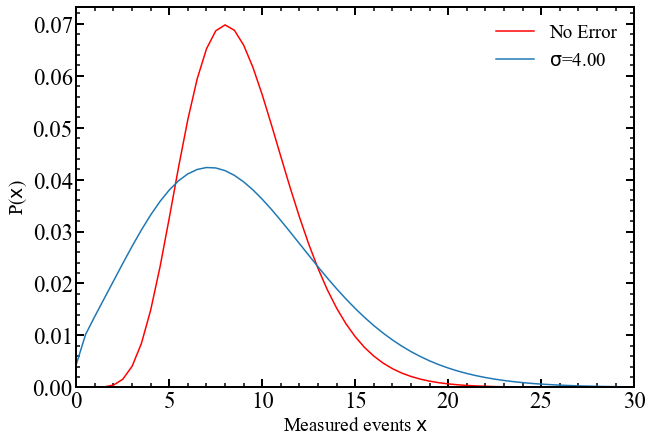

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:138: RuntimeWarning: divide by zero encountered in log


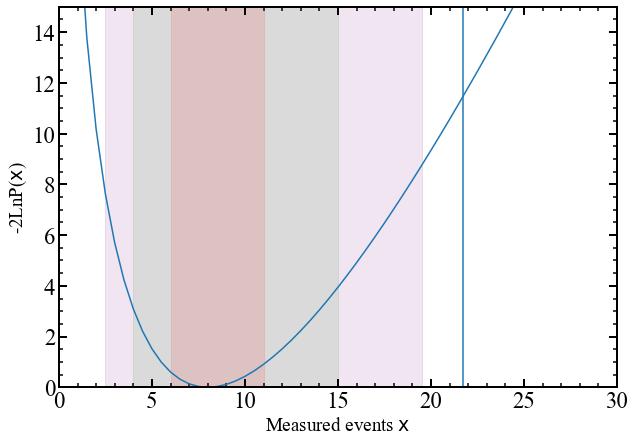

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide


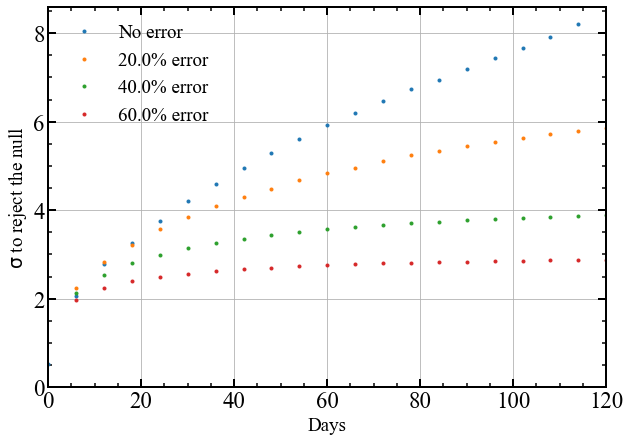

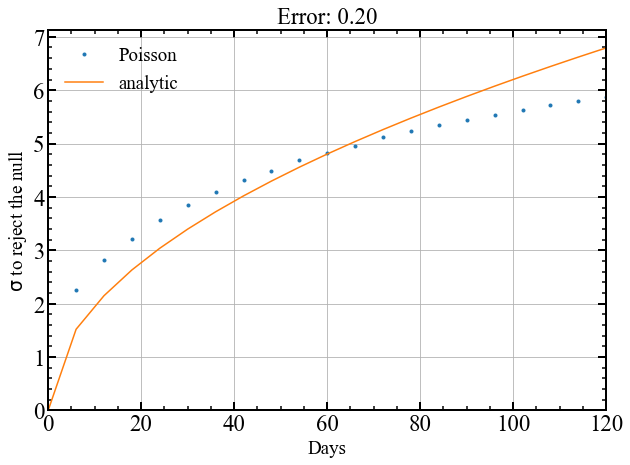

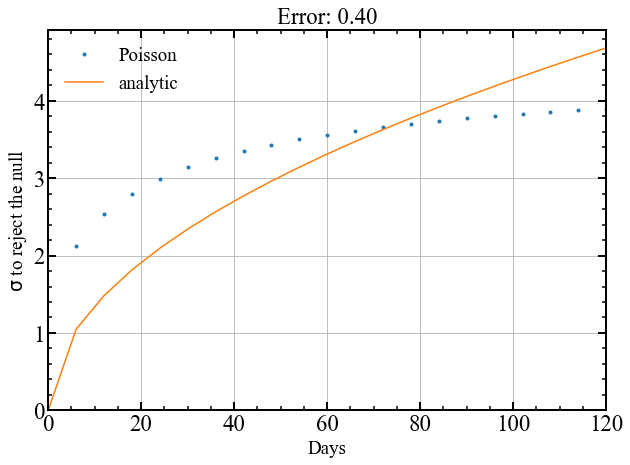

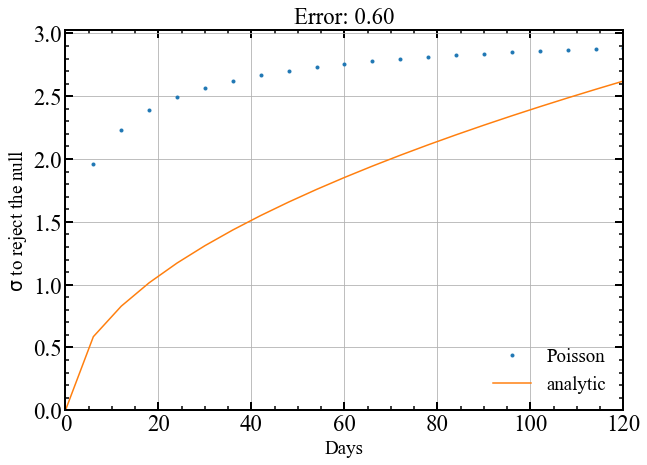

In [42]:
'''
Here we consider the rejection of the null-hypothesis (background only) in the
presence of an 
'''

from scipy.special import gamma, erf, erfinv
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('snoplus')

bkg_nom = (2.8)/7.
measure_nom = bkg_nom+(4.8*2)/7.
livetime = 20 # days

## Here we can test the case  of a single reactor
#measure_nom = bkg_nom+(4.8*1)/7.

# Test
#bkg_nom = (2.8+4.8)/7
measure_nom = bkg_nom + 4.8/7

bkg = bkg_nom * livetime
measure = measure_nom * livetime
cl = 3 #sigma

def normal(x,mu):
    mu += 0.5 # for reasons
    s = (mu)**0.5
    return (2*np.pi*s**2)**-0.5*np.e**(-(x-mu)**2/2/s**2)

def poisson(x, mu):
    return x**mu*np.e**(-x)/gamma(mu+1)

def cousins(x, f, alpha):
    f[x<0] = 0
    ss = f.argsort()[::-1]
    cc = np.cumsum(f[ss])
    cc = cc / np.max(cc)
    xlbound = np.min((x[ss])[cc<alpha])
    xrbound = np.max((x[ss])[cc<alpha])
    return xlbound, xrbound

def likelihood(s,b):
    f  = poisson(s,b)
    f2 = normal(s, b)
    nan = np.where(np.isnan(f))
    inf = np.where(np.isinf(f))
    f[nan] = f2[nan]
    f[inf] = f2[inf]
    f = np.nan_to_num(f)
    return f

def fLikelihood(s, b, bhat, db):
    sv, bv = np.meshgrid(s, b)
    ## We know ignore more than 6*sigma left, right
    bvL, bvR = bhat-6*(db**2+bhat)**0.5, bhat+6*(db**2+bhat)**0.5
    f = likelihood(sv, bv) * np.e**(-(bv-bhat)**2/2/db**2)
    f[bv<bvL] = 0
    f[bv>bvR] = 0
    f[f<0]=0
    f = np.nan_to_num(f)
    f[sv<0] = 0
    f[bv<0] = 0
    return f

def marginalize(fLike):
    ## Assume s, b
    marge = np.sum(fLike, axis=0)
    marge = marge / np.sum(marge)
    return marge

def sigma_to_cl(sigma):
    return erf(sigma/2**0.5)

def cl_to_sigma(cl):
    return erfinv(cl)*2**0.5

def cousins_zero_cl(x, f):
    f[x<0] = 0
    ss = f.argsort()[::-1]
    cc = np.cumsum(f[ss])
    cc = cc / np.max(cc)
    return np.min(cc[x[ss]<=0])

def cousins_reject_cl(x, f, m):
    f[x<0] = 0
    ss = f.argsort()[::-1]
    cc = np.cumsum(f[ss])
    cc = cc / np.max(cc)
    return cc[x[ss]>=m][0]

def jeremy(time, r, b, db):
    #return k1=k2
    return 2*time**0.5*(r-2*db)/((r+b-db)**0.5+(b+db)**0.5)
    #return 2*time**0.5*(r-2*db)/((b+db)**0.5+(r+b+db)**0.5)
    
error = 0.5

x = np.linspace(0,300,601)
y = np.linspace(0,300,601)
bg_uncertainty = error * (bkg)
prob = likelihood(x, bkg)
prob = prob/np.sum(prob)
full_prob = fLikelihood(x, x, bkg, bg_uncertainty)
mg = marginalize(full_prob)
## Test

cc = np.cumsum(prob)
cc = cc/np.max(cc)
#print(cc)
#print(cc[x>=measure])
confidence = cc[x>=measure][0]
print(cl_to_sigma(confidence))
print('Cousins version:', cl_to_sigma(cousins_reject_cl(x, prob, measure)))
print('Cousins[m] version:', cl_to_sigma(cousins_reject_cl(x, mg, measure)))

xl, xr = cousins(x, prob, sigma_to_cl(cl))
print(xl, xr)

print('MLE: %0.3f' % x[np.argmax(prob)])

xmin, xmax = 0, 30

plt.plot(x, prob, color='red', label='No Error')
print('mg sum', np.sum(mg))
plt.plot(x, mg, label='$\sigma$=%0.2f'%(bg_uncertainty))
#plt.title('Conf: %0.2f'%confidence)
#plt.axvline(measure)
#plt.fill_between(x, prob, where=(x>=xl)&(x<=xr), color='blue', alpha=0.3)
plt.xlim(xmin,xmax)
plt.ylim(bottom=0)
plt.xlabel('Measured events $x$')
plt.ylabel('$\mathcal{P}(x)$')
plt.legend()
plt.show()

# Delta Log-Likelihood
dll = -2*np.log(prob)
dll = dll - np.min(dll)
plt.plot(x, dll)
plt.axvline(measure)
xl1, xr1 = cousins(x, prob, sigma_to_cl(1))
xl2, xr2 = cousins(x, prob, sigma_to_cl(2))
plt.axvspan(xl, xr, alpha=0.1, color='purple')
plt.axvspan(xl2, xr2, alpha=0.1, color='green')
plt.axvspan(xl1, xr1, alpha=0.1, color='red')
plt.ylim(0, 15)
plt.xlim(xmin, xmax)
plt.xlabel('Measured events $x$')
plt.ylabel('-2Ln$\mathcal{P}(x)$')
plt.show()

# Sigma(days)
days = np.linspace(0,120,21)
k = []
mK = []
## Some others, maybe error_list of 0.2, 0.4, 0.6
e_list = np.array([0.2, 0.4, 0.6])
mK = [[] for e in e_list]

for d in days:
    b = bkg_nom * d
    m = measure_nom * d
    pb = likelihood(x, b)
    k.append( cl_to_sigma(cousins_reject_cl(x,pb,m)) )
    ## Margen.
    for e in range(len(e_list)):
        marg_pb = marginalize(fLikelihood(x, x, b, e_list[e]*b))
        mK[e].append( cl_to_sigma(cousins_reject_cl(x, marg_pb, m)))

k = np.array(k)
mK = np.array(mK)

plt.plot(days, k, '.', label='No error')
for e,m in zip(e_list, mK):
    plt.plot(days, m, '.', label='%0.1f%% error'%(e*100))

clrs = ['xkcd:orange', 'xkcd:green', 'xkcd:teal', 'xkcd:violet', 'xkcd:magenta']
#for s,c in zip(range(1,6), clrs):
#     try:
#         plt.vlines(days[k>=s][0], 0, s, label='%i $\sigma$ [%0.2f days]'%(s,days[k>=s][0]), color=c)
#     except:
#         pass
plt.xlim(0, np.max(days))
plt.ylim(bottom=0)
plt.ylabel('$\sigma$ to reject the null')
plt.xlabel('Days')
plt.legend()
plt.grid()
plt.show()

for e,m in zip(e_list,mK):
    plt.plot(days, m, '.', label='Poisson')
    plt.plot(days, jeremy(days, measure_nom-bkg_nom, bkg_nom, e*bkg_nom), label='analytic')
    clrs = ['xkcd:orange', 'xkcd:green', 'xkcd:teal', 'xkcd:violet', 'xkcd:magenta']
#     for s,c in zip(range(1,6), clrs):
#         try:
#             plt.vlines(days[m>=s][0], 0, s, label='%i $\sigma$ [%0.2f days]'%(s,days[m>=s][0]), color=c)
#         except:
#             pass
    plt.xlim(0, np.max(days))
    plt.ylim(bottom=0)
    #plt.ylabel('-2Ln$\mathcal{L}$')
    plt.ylabel('$\sigma$ to reject the null')
    plt.xlabel('Days')
    plt.title('Error: %0.2f'%e)
    plt.legend()
    plt.grid()
    plt.show()

# Now lets include an uncertainty on the background and margenalize


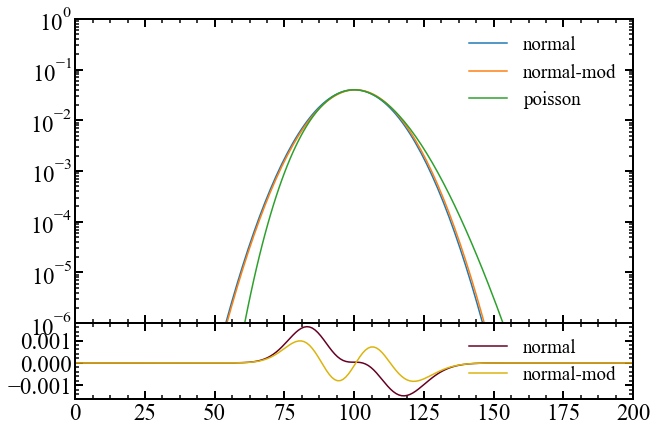

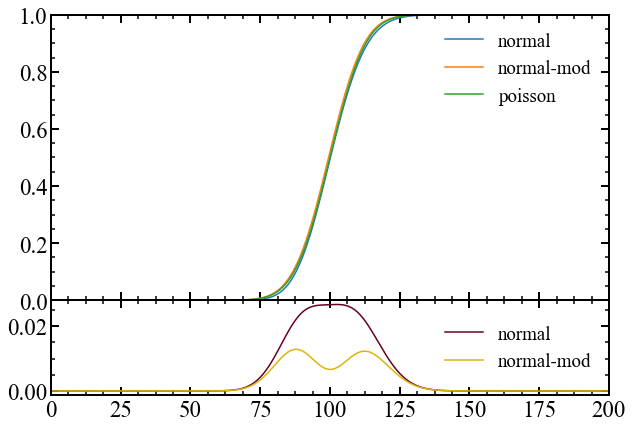

In [93]:
## Compare poisson to gaussian
from scipy.special import gamma
def normal(x,mu):
    s = (mu)**0.5
    return (2*np.pi*s**2)**-0.5*np.e**(-(x-mu)**2/2/s**2)

def poisson(x, mu):
    return x**mu*np.e**(-x)/gamma(mu+1)

mu = 100
x = np.linspace(0, 200, 201)
fishy = poisson(x, mu)
normy = normal(x, mu)
nmod = normal(x, mu+0.5)

fig, axs = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[4,1]})
axs[0].plot(x, normy, label='normal')
axs[0].plot(x, nmod, label='normal-mod')
axs[0].plot(x, fishy, label='poisson')
axs[0].legend()
axs[0].set_xlim(0,200)
axs[0].set_yscale('log')
axs[0].set_ylim(1e-6, 1)

axs[1].plot(x, normy-fishy, color='xkcd:maroon', label='normal')
axs[1].plot(x, nmod-fishy, color='xkcd:gold', label='normal-mod')
#axs[1].set_ylim(-0.003, 0.003)
axs[1].legend(loc='right')

fig.subplots_adjust(hspace=0)
plt.show()

## repeat for cdf
def cdf(f):
    cc = np.cumsum(f)
    cc = cc / np.max(cc)
    return cc

cfish = cdf(fishy)
cnorm = cdf(normy)
cmod = cdf(nmod)

fig, axs = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[3,1]})
axs[0].plot(x, cfish, label='normal')
axs[0].plot(x, cnorm, label='normal-mod')
axs[0].plot(x, cmod, label='poisson')
axs[0].legend()
axs[0].set_xlim(0,200)
axs[0].set_ylim(0, 1)

axs[1].plot(x, cnorm-cfish, color='xkcd:maroon', label='normal')
axs[1].plot(x, cmod-cfish, color='xkcd:gold', label='normal-mod')
#axs[1].set_ylim(-0.003, 0.003)
axs[1].legend(loc='right')

fig.subplots_adjust(hspace=0)
plt.show()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


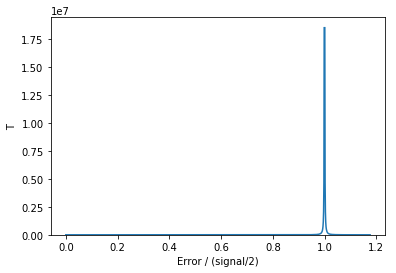

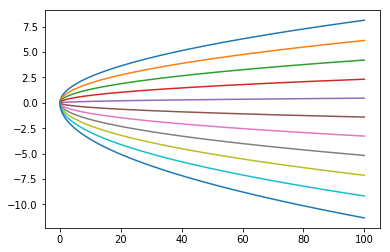

In [40]:
## Jeremy
def j(r, b, db, k):
    # k1=k2=k
    bhi = b+db
    blo = b-db
    return (k*bhi**0.5+k*(r+blo)**0.5)/(r-(bhi-blo))

def j_inv(time, r, b, db):
    #return k1=k2
    return 2*time**0.5*(r-2*db)/((r+b-db)**0.5+(b+db)**0.5)

## Two things to plot, root_t vs db, then k vs T
# signal to noise:
snr = 1.7

b = 2.8/7
s = b*snr

db = np.linspace(0,1,1001)*b
plt.plot(db/(s/2), j(s, b, db, 2)**2)
plt.xlabel('Error / (signal/2)')
plt.ylim(bottom=0)
plt.ylabel('T')
plt.show()

T = np.linspace(0,100,1001)
bset = np.linspace(0,2,11)
for bb in bset:
    plt.plot(T, j_inv(T, s, b, bb*b))
plt.show()